### Import modules

In [261]:
import pandas as pd
import pickle
from mpl_toolkits.basemap import Basemap
import matplotlib.pyplot as plt
import datetime
import matplotlib.animation as animation
import numpy as np

### Get noise data

In [299]:
df = pd.read_csv("BGS_noise.csv", index_col=0)
with open("params_BGS_IRIS.pkl", "rb") as f:  # Python 3: open(..., 'wb')
    datelist, station_list, dataset, nslc_all = pickle.load(f)
df.index=pd.to_datetime(df.index)
df['Date2'] = pd.to_datetime(df.index).date
df['weekday'] = pd.to_datetime(df.index)
df['weekday'] = (df['weekday'].dt.weekday)
df = df[df['Date2'] >= datetime.date(2020, 1 ,15)]
max_d = df["disp"].max()*1e9
min_d = 20
#df = df[df['weekday'] <= 4]   # Select only weekdays
pd.set_option('display.max_rows', None)
datelist = [d for d in datelist if d.weekday()<7 and d > datetime.date(2020,1,15)]

### Get the Google mobility data

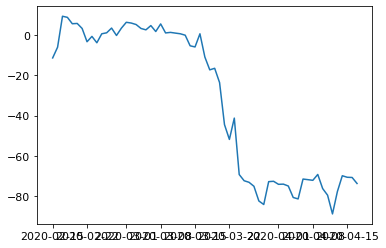

In [271]:
df_goo = pd.read_csv("Global_Mobility_Report.csv")
df_goo = df_goo[df_goo["country_region_code"] == "GB"]
df_goo.index=pd.to_datetime(df_goo["date"])
df_goo = df_goo.groupby(df_goo.index.date).mean()
plt.plot(df_goo.index, df_goo["retail_and_recreation_percent_change_from_baseline"])

### Make the animation

Working on frame 0
Working on frame 0
Working on frame 1
Working on frame 2
Working on frame 3
Working on frame 4
Working on frame 5
Working on frame 6
Working on frame 7
Working on frame 8
Working on frame 9
Working on frame 10
Working on frame 11
Working on frame 12
Working on frame 13
Working on frame 14
Working on frame 15
Working on frame 16
Working on frame 17
Working on frame 18
Working on frame 19
Working on frame 20
Working on frame 21
Working on frame 22
Working on frame 23
Working on frame 24
Working on frame 25
Working on frame 26
Working on frame 27
Working on frame 28
Working on frame 29
Working on frame 30
Working on frame 31
Working on frame 32
Working on frame 33
Working on frame 34
Working on frame 35
Working on frame 36
Working on frame 37
Working on frame 38
Working on frame 39
Working on frame 40
Working on frame 41
Working on frame 42
Working on frame 43
Working on frame 44
Working on frame 45
Working on frame 46
Working on frame 47
Working on frame 48
Working on 

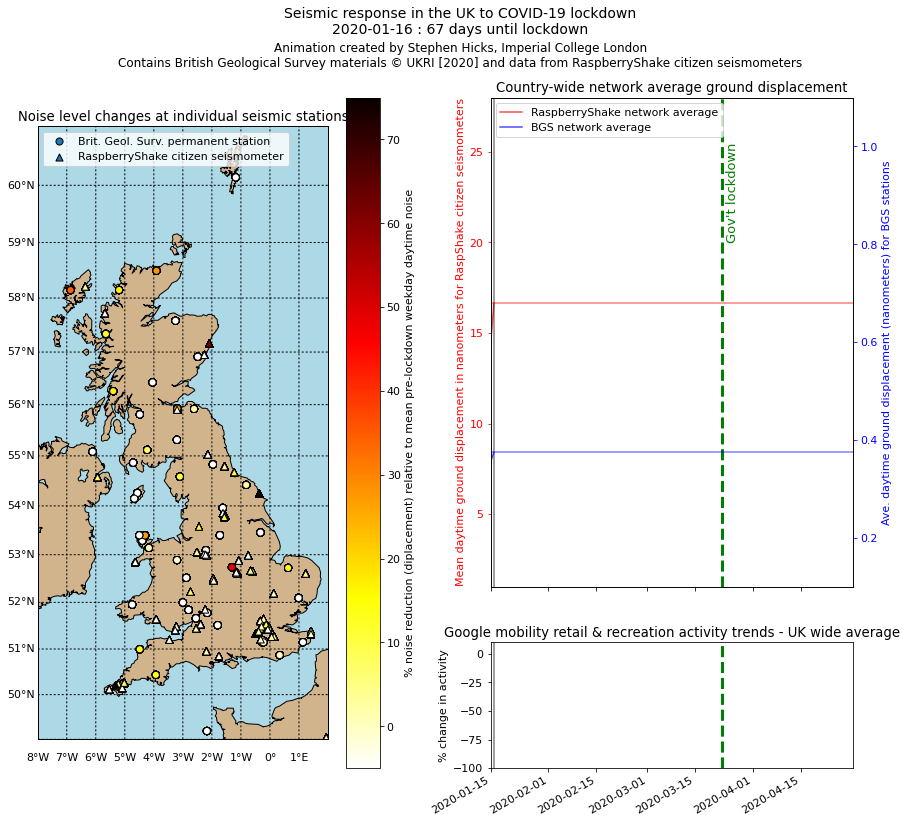

In [318]:
import matplotlib
plt.rcParams.update({'font.size': 11})

# Parameters to define
min_lat = 49
max_lat = 61
min_lon = -8
max_lon = 2
LOCKDOWN = datetime.datetime(2020, 3, 23)
# End of parameters to define

lines = []
lines2 = []
ll = []
def animate(i):
    """
    This is the beefy function to update the animation
    """
    print("Working on frame", i)
    # Remove previous plt.plot instances
    for line in lines:
        lines.remove(line)
        del line
    lines[:] = []
   
    # Remove axvline / axhlines objects apart from lockdown vertical line
    ax2.lines= [ax2.lines[0]]
    ax3.lines= []
    ax4.lines = [ax4.lines[0]]
    
    dl = (LOCKDOWN - datelist[i]).days
    df_filt = df[(df["Date2"] == datelist[i])]
    df_filt_rs = df_filt[(df_filt["net"]=="AM")]
    df_filt_gb = df_filt[(df_filt["net"]=="GB")]
    x, y = m(df_filt_gb["lon"].values, df_filt_gb["lat"].values)
    m.scatter(x, y, s=50, c=df_filt_gb["disp_pc"], zorder=10, **kw, label="BGS permanent station", marker="o")

    x, y = m(df_filt_rs["lon"].values, df_filt_rs["lat"].values)
    
    m.scatter(x, y, s=50, c=df_filt_rs["disp_pc"], zorder=10, **kw, label="RaspberryShake", marker="^")
    if dl >= 0:
        supstr = ("Seismic response in the UK to COVID-19 lockdown\n{:} : {:2.0f} days until lockdown"
                  .format(datelist[i].date(), dl))
    else:
        supstr = ("Seismic response in the UK to COVID-19 lockdown\n{:} : {:2.0f} days since lockdown"
                  .format(datelist[i].date(), dl*-1))
    plt.suptitle(supstr, fontsize=14)

    df_filt = df[(df["Date2"] <= datelist[i]) & (df["net"] == "AM")]
    means = df_filt.groupby(pd.Grouper(freq='1D')).median()
    lines.append(ax2.plot(means.index, means["disp"]*1e9, c="red", alpha=0.7,
                          label="RaspberryShake network average"))
    ax2.axvline(means.index[-1], c="k", alpha=0.5)
    ax2.axhline(means["disp"][-1]*1e9, c="red", alpha=0.5)

    df_filt = df[(df["Date2"] <= datelist[i]) & (df["net"] == "GB")]
    means = df_filt.groupby(pd.Grouper(freq='1D')).median()
    lines.append(ax3.plot(means.index, means["disp"]*1e9, c="blue", alpha=0.7,
                          label="BGS network average"))
    ax3.axhline(means["disp"][-1]*1e9, c="blue", alpha=0.5)
    lines_leg = ax2.get_lines() + ax3.get_lines()
    ax2.legend(lines_leg, [l.get_label() for l in lines_leg], loc=2)
    
    df_goo_filt = df_goo[(df_goo.index <= datelist[i])]
    lines.append(ax4.plot(df_goo_filt.index, df_goo_filt["retail_and_recreation_percent_change_from_baseline"],
                          color="m"))
    ax4.axvline(means.index[-1], c="k", alpha=0.5)
    if len(df_goo_filt) > 0:
        ax4.axhline(df_goo_filt["retail_and_recreation_percent_change_from_baseline"][-1], c="m", alpha=0.5)

# Make figure
fig = plt.figure(figsize=(13,12))
gs = fig.add_gridspec(4, 2)

# First, deal with the map subplot
ax1 = fig.add_subplot(gs[:, 0])
ax1.set_title("Noise level changes at individual seismic stations")
m = Basemap(projection='merc',llcrnrlat=min_lat,urcrnrlat=max_lat,llcrnrlon=min_lon, urcrnrlon=max_lon,
            resolution='i', ax=ax1)

m.fillcontinents(color='tan',lake_color='lightblue')
m.drawparallels(np.arange(min_lat,max_lat,1.),labels=[True,False,False,False],dashes=[2,2])
m.drawmeridians(np.arange(min_lon,max_lon,1.),labels=[False,False,False,True],dashes=[2,2])
m.drawmapboundary(fill_color='lightblue')
m.drawcoastlines()

# Initial dummy plots for making the map legend
df_filt_gb = df[(df["Date2"] == datelist[0]) & (df["net"] == "GB")]
x, y = m(df_filt_gb["lon"].values, df_filt_gb["lat"].values)
sc = m.scatter(x, y, c=df_filt_gb["disp_pc"], s=50, zorder=10, **kw, label="Brit. Geol. Surv. permanent station", marker="o")
df_filt_rs = df[(df["Date2"] == datelist[0]) & (df["net"] == "AM")]
x, y = m(df_filt_rs["lon"].values, df_filt_rs["lat"].values)
m.scatter(x, y, c=df_filt_rs["disp_pc"], s=50, zorder=10, **kw, label="RaspberryShake citizen seismometer", marker="^")
cbar = plt.colorbar(sc)
cbar.set_label("% noise reduction (diplacement) relative to mean pre-lockdown weekday daytime noise")
plt.legend(loc=2)

kw = dict(cmap=plt.cm.hot_r, vmin=-5, vmax=75, edgecolor="k")

# Now make the daily average network noise level subplot
ax2 = fig.add_subplot(gs[0:3, 1])
ax2.set_xlim([datetime.date(2020, 1 ,15), datetime.datetime.now()])
ax2.axvline(LOCKDOWN, lw=3, ls="--", c="green")
ax2.text(LOCKDOWN+datetime.timedelta(days=1), 20, "Gov't lockdown", fontsize=13, rotation=90,
         verticalalignment='bottom', ha="left", color="green")
ll.append(ax2.axvline(0))
ax2.set_ylim([1, 28])
ax2.set_title("Country-wide network average ground displacement")
ax2.set_ylabel("Mean daytime ground displacement in nanometers for RaspShake citizen seismometers", color="red")
ax2.tick_params(axis='y', colors='red')
fig.autofmt_xdate(bottom=0.2, rotation=30, ha='right')
ax3 = ax2.twinx()
ax3.set_ylabel("Ave. daytime ground displacement (nanometers) for BGS stations", color="blue")
ax3.set_ylim([0.1, 1.1])
ax3.tick_params(axis='y', colors='blue')

# Now make the Google mobility trend subplot
ax4 = fig.add_subplot(gs[3, 1],sharex=ax2)
ax4.set_title("Google mobility retail & recreation activity trends - UK wide average")
ax4.set_ylabel("% change in activity")
ax4.axvline(LOCKDOWN, lw=3, ls="--", c="green")
ax4.set_ylim([-100, 10])
fig.autofmt_xdate(bottom=0.2, rotation=30, ha='right')

# Now make the animation
anim = animation.FuncAnimation(fig, animate, frames=len(datelist), interval=500,)
fig.tight_layout(rect=[0, 0.03, 1, 0.92])
plt.text(x=0.5, y=0.94, s=
         "Animation created by Stephen Hicks, Imperial College London\n"
         "Contains British Geological Survey materials © UKRI [2020] and data from RaspberryShake citizen seismometers", 
         fontsize=12, ha="center", va="top", transform=fig.transFigure)
anim.save('basic_animation.mp4', fps=4, extra_args=['-vcodec', 'libx264'], bitrate=5000)